In [1]:
from tuning import train_test_split, hyperparameter_tuning, hyperparameter_tuning_cv
from performance import print_report
from ucimlrepo import fetch_ucirepo 
from DecisionTree import DecisionTree
from RandomForest import RandomForest

In [2]:
# fetch dataset from ucimlrepo
secondary_mushroom = fetch_ucirepo(id=848) 
# data (as pandas dataframes) 
X = secondary_mushroom.data.features # features of the dataset
y = secondary_mushroom.data.targets  # target values of the dataset

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [4]:
# let's see if the dataset is balanced
y.value_counts(normalize=True)

class
p        0.554913
e        0.445087
Name: proportion, dtype: float64

In [5]:
# Define all mappings for the categorical features from the documentation of the dataset
cap_shape_mapping = {
    'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat',
    's': 'sunken', 'p': 'spherical', 'o': 'others'
}

cap_surface_mapping = {
    'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth',
    'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky',
    'w': 'wrinkled', 'e': 'fleshy'
}

cap_color_mapping = {
    'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
    'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
    'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'
}

does_bruise_bleed_mapping = {'t': 'true', 'f': 'false'}

gill_attachment_mapping = {
    'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free',
    's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'
}

gill_spacing_mapping = {'c': 'close', 'd': 'distant', 'f': 'none'}

# Same colors as cap_color_mapping + 'f': 'none'
gill_color_mapping = {**cap_color_mapping, 'f': 'none'}

stem_root_mapping = {
    'b': 'bulbous', 's': 'swollen', 'c': 'club', 'u': 'cup',
    'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', 'f': 'none'
}

stem_surface_mapping = {**cap_surface_mapping, 'f': 'none'}  # Same mapping as cap-surface + 'f'
stem_color_mapping = gill_color_mapping # Same mapping as gill-color

veil_type_mapping = {'p': 'partial', 'u': 'universal'}

veil_color_mapping = gill_color_mapping

has_ring_mapping = {'t': 'true', 'f': 'false'}

ring_type_mapping = {
    'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved',
    'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone',
    'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'
}

spore_print_color_mapping = cap_color_mapping  # Same mapping as cap-color

habitat_mapping = {
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
    'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
}

season_mapping = {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}

X.loc[:, 'cap-shape'] = X['cap-shape'].replace(cap_shape_mapping)
X.loc[:, 'cap-surface'] = X['cap-surface'].replace(cap_surface_mapping)
X.loc[:, 'cap-color'] = X['cap-color'].replace(cap_color_mapping)
X.loc[:, 'does-bruise-or-bleed'] = X['does-bruise-or-bleed'].replace(does_bruise_bleed_mapping)
X.loc[:, 'gill-attachment'] = X['gill-attachment'].replace(gill_attachment_mapping)
X.loc[:, 'gill-spacing'] = X['gill-spacing'].replace(gill_spacing_mapping)
X.loc[:, 'gill-color'] = X['gill-color'].replace(gill_color_mapping)
X.loc[:, 'stem-root'] = X['stem-root'].replace(stem_root_mapping)
X.loc[:, 'stem-surface'] = X['stem-surface'].replace(stem_surface_mapping)
X.loc[:, 'stem-color'] = X['stem-color'].replace(stem_color_mapping)
X.loc[:, 'veil-type'] = X['veil-type'].replace(veil_type_mapping)
X.loc[:, 'veil-color'] = X['veil-color'].replace(veil_color_mapping)
X.loc[:, 'has-ring'] = X['has-ring'].replace(has_ring_mapping)
X.loc[:, 'ring-type'] = X['ring-type'].replace(ring_type_mapping)
X.loc[:, 'spore-print-color'] = X['spore-print-color'].replace(spore_print_color_mapping)
X.loc[:, 'habitat'] = X['habitat'].replace(habitat_mapping)
X.loc[:, 'season'] = X['season'].replace(season_mapping)

In [6]:
y = y['class']
y = y.map({'p': 'poisonous', 'e': "edible"})

In [7]:
for col in X.columns:
    print(f"{col}: {X[col].unique()}")

cap-diameter: [15.26 16.6  14.07 ... 22.85 21.8  20.42]
cap-shape: ['convex' 'flat' 'spherical' 'bell' 'conical' 'sunken' 'others']
cap-surface: ['grooves' 'shiny' nan 'sticky' 'scaly' 'fleshy' 'smooth' 'leathery' 'd'
 'wrinkled' 'fibrous' 'silky']
cap-color: ['orange' 'red' 'brown' 'gray' 'green' 'white' 'yellow' 'pink' 'purple'
 'buff' 'blue' 'black']
does-bruise-or-bleed: ['false' 'true']
gill-attachment: ['free' nan 'adnate' 'decurrent' 'sinuate' 'adnexed' 'pores' 'none']
gill-spacing: [nan 'close' 'distant' 'none']
gill-color: ['white' 'brown' 'pink' 'purple' 'buff' 'gray' 'yellow' 'green' 'red'
 'orange' 'black' 'none']
stem-height: [16.95 17.99 17.8  ...  1.23  1.16  0.  ]
stem-width: [17.09 18.19 17.74 ... 32.59 30.99 30.51]
stem-root: ['swollen' nan 'bulbous' 'rooted' 'club' 'none']
stem-surface: ['scaly' nan 'smooth' 'silky' 'fibrous' 'shiny' 'sticky' 'grooves' 'none']
stem-color: ['white' 'yellow' 'brown' 'purple' 'buff' 'blue' 'green' 'pink' 'red'
 'black' 'gray' 'orange' '

### No 'unknown' but there are some 'none' in the dataset that we have to manage (see comments in the code below)
#### After searching about mushrooms, I found that 'none' is not a missing value, it is a valid value for some features

In [8]:
# for every column substitute 'none' with null value
#for col in X.columns:
   #X.loc[:,col] = X[col].replace('none', np.nan)

In [9]:
#for col in X.columns:
    #print(f"{col}: {X[col].unique()}")

### For the attribute cap-surface there is a value "d" which is not present in the documentation. I keep it but maybe could be a typo.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Get the column with more than 80% of missing values
missing_values = X_train.isnull().mean()
missing_values = missing_values[missing_values > 0.8] * 100
for col, percentage in missing_values.items():
    print(f"{col}: {percentage:.2f}% missing values")

stem-root: 84.40% missing values
veil-type: 94.67% missing values
veil-color: 87.83% missing values
spore-print-color: 89.60% missing values


In [12]:
# Drop the column with more than 80% of missing values
X_train = X_train.drop(columns=missing_values.index)
X_test = X_test.drop(columns=missing_values.index)

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [13]:
# Fill null values with median and mode (avoid data leakage)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        new_val = X_train[col].mode()[0]
    else:
        new_val = X_train[col].median() # We don't have missing values in numerical columns in this dataset
    X_train.loc[:, col] = X_train[col].fillna(new_val)
    X_test.loc[:, col] = X_test[col].fillna(new_val)

In [14]:
# For each attribute -> value count
for col in X_train.columns:
    print(f"{col}: {X_train[col].value_counts()}")

cap-diameter: cap-diameter
3.18     87
3.13     80
3.24     79
4.04     79
3.97     77
         ..
50.60     1
54.03     1
57.76     1
57.08     1
20.80     1
Name: count, Length: 2458, dtype: int64
cap-shape: cap-shape
convex       21482
flat         10735
sunken        5713
bell          4580
others        2813
spherical     2090
conical       1443
Name: count, dtype: int64
cap-surface: cap-surface
sticky      17858
smooth       6094
scaly        5085
shiny        3960
grooves      3791
d            3542
fleshy       2071
silky        1843
fibrous      1758
wrinkled     1724
leathery     1130
Name: count, dtype: int64
cap-color: cap-color
brown     19400
yellow     6841
white      6149
gray       3490
red        3225
orange     2943
green      1429
pink       1391
purple     1370
black       999
buff        969
blue        650
Name: count, dtype: int64
does-bruise-or-bleed: does-bruise-or-bleed
false    40425
true      8431
Name: count, dtype: int64
gill-attachment: gill-attachment
a

### For stem-height and stem-width there are a 849 mushrooms with 0.0 value. I don't know if this is a typo or a real value. I will keep them.

In [15]:
# show how many unique rows are in the dataset
print("There are", X_train.duplicated().sum(), "duplicates in the training set out of", len(X_train), "rows")

There are 107 duplicates in the training set out of 48856 rows


In [16]:
# Drop duplicates to avoid overfitting
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]

### For the decision tree is not necessary to scale the data. And it's robust to outliers.

In [17]:
tree = DecisionTree(max_depth=5, min_samples_split=100, criterion='gini')
tree.fit(X_train, y_train)

In [18]:
tree.draw_tree("small_tree")

In [19]:
y_pred = tree.predict(X_test)
print_report(y_test, y_pred, "poisonous")

0-1 Loss: 0.26021452550560875
Accuracy: 0.7397854744943912
Precision: 0.8943179305770507
Recall: 0.5997034840622684
F1 Score: 0.717962371317004
Confusion Matriy_pred:
[[4045  478]
 [2700 4990]]


In [20]:
tree.print_importance()

Feature importance:
cap-surface: 0.6351302309243709
stem-height: 0.09702686132903368
ring-type: 0.05444770201150856
habitat: 0.043774125262295994
cap-shape: 0.04177571132147216
stem-color: 0.0400258072794253
gill-spacing: 0.03364681628223551
stem-width: 0.01570577537825507
stem-surface: 0.014998276887692945
cap-color: 0.013439131927992978
does-bruise-or-bleed: 0.010029561395716754
cap-diameter: 0.0
gill-attachment: 0.0
gill-color: 0.0
has-ring: 0.0
season: 0.0


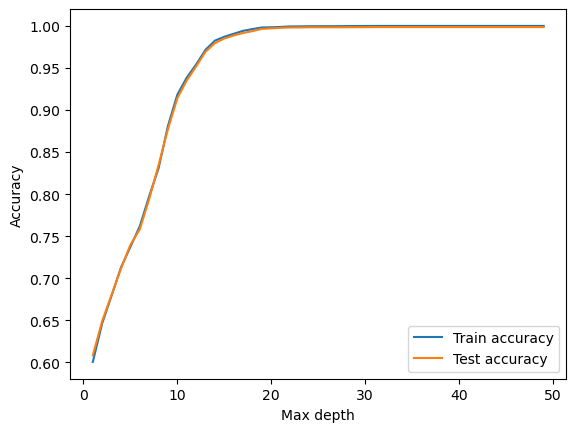

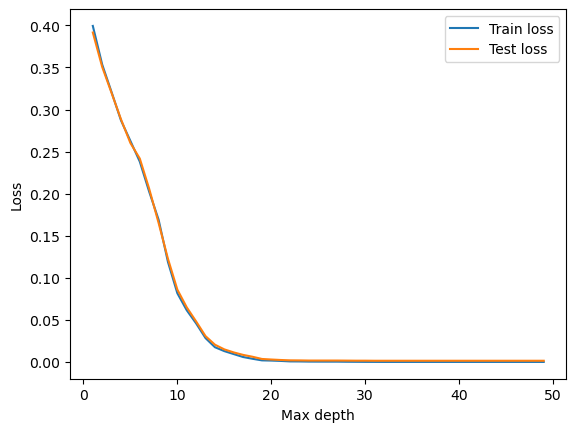

In [21]:
import matplotlib.pyplot as plt
from performance import accuracy, zero_one_loss
train_accs = []
test_accs = []
train_losses = []  
test_losses = []
for max_depth in range(1, 50):
    tree = DecisionTree(max_depth=max_depth, criterion="gini")
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_train)
    train_accs.append(accuracy(y_train, y_pred))
    train_losses.append(zero_one_loss(y_train, y_pred))
    y_pred = tree.predict(X_test)
    test_accs.append(accuracy(y_test, y_pred))
    test_losses.append(zero_one_loss(y_test, y_pred))

plt.plot(range(1, 50), train_accs, label="Train accuracy")
plt.plot(range(1, 50), test_accs, label="Test accuracy")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# Of course the loss is 1 - accuracy
plt.plot(range(1, 50), train_losses, label="Train loss")
plt.plot(range(1, 50), test_losses, label="Test loss")
plt.xlabel("Max depth")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
param_grid = {
        'max_depth': [10, 20, 50, None],
        'min_samples_split': [2, 5, 10, 100],
        'min_impurity_decrease': [0.0, 0.01], 
        'criterion': ['gini','scaled_entropy', 'squared']
    }
best_tree, best_params, best_loss = hyperparameter_tuning(X_train, y_train, param_grid, 'decision_tree')

Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'gini'} Loss:  0.07918760898553698
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'scaled_entropy'} Loss:  0.1541696584265053
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'squared'} Loss:  0.1895579033747051
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'gini'} Loss:  0.08072622833111089
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'scaled_entropy'} Loss:  0.1554005539029644
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'squared'} Loss:  0.27223304954354294
Params:  {'max_depth': 10, 'min_samples_split': 5, 'min_impurity_decrease': 0.0, 'criterion': 'gini'} Loss:  0.07918760898553698
Params:  {'max_depth': 10, 'min_samples_split': 5, 'min_impurity_decrea

In [22]:
best_tree_cv, best_params_cv, best_loss_cv = hyperparameter_tuning_cv(X_train, y_train, param_grid, cv=5)

Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'squared'} CV Loss:  0.2753083945493423
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'squared'} CV Loss:  0.20037310861600535
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'scaled_entropy'} CV Loss:  0.1501976660328081
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'scaled_entropy'} CV Loss:  0.1468749257649042
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'gini'} CV Loss:  0.12104802438645912
Params:  {'max_depth': 10, 'min_samples_split': 5, 'min_impurity_decrease': 0.0, 'criterion': 'scaled_entropy'} CV Loss:  0.14716177490919513
Params:  {'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'gini'} CV Loss:  0.10455531481203857
Params:  {'max_depth': 10, 'min_samples_

In [23]:
print(f"Best hyperparameters: {best_params}, loss: {best_loss}")
print(f"Best hyperparameters CV: {best_params_cv}, loss: {best_loss_cv}")

Best hyperparameters: {'max_depth': 50, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'squared'}, loss: 0.0013334700994973843
Best hyperparameters CV: {'max_depth': None, 'min_samples_split': 10, 'min_impurity_decrease': 0.0, 'criterion': 'gini'}, loss: 0.001148734781476601


In [24]:
print("Importance with no hyperparameter tuning")
best_tree.draw_tree("tuned_tree")
best_tree.print_importance()
print("-"*50)
print("Importance with CV hyperparameter tuning")
best_tree_cv.draw_tree("tuned_tree_cv")
best_tree_cv.print_importance()

Importance with no hyperparameter tuning
Feature importance:
cap-surface: 0.19054768548614845
gill-color: 0.15475785742329431
cap-diameter: 0.10410201859123083
gill-attachment: 0.08784500548377976
stem-width: 0.07690034898770039
cap-shape: 0.07000264516391526
cap-color: 0.06845584638383609
stem-surface: 0.059290572615234856
stem-height: 0.04989642209834991
stem-color: 0.04433401538554294
does-bruise-or-bleed: 0.04001201221851434
gill-spacing: 0.01606919712313773
ring-type: 0.013497422148926042
season: 0.011858223491005222
has-ring: 0.009418206122058
habitat: 0.003012521277325781
--------------------------------------------------
Importance with CV hyperparameter tuning
Feature importance:
cap-surface: 0.19784932189058882
gill-attachment: 0.15728065709784309
cap-shape: 0.12008198669798736
stem-width: 0.08272328723447556
stem-color: 0.07854391522571917
stem-height: 0.06974836968711552
cap-color: 0.06950213109331155
cap-diameter: 0.057785190284691104
gill-color: 0.054681932359380764
habit

In [25]:
y_pred = best_tree.predict(X_test)
print("Normal hyperparameter tuning")
print_report(y_test, y_pred, "poisonous")
print("-"*50)
print("Cross-validated hyperparameter tuning")
y_pred = best_tree_cv.predict(X_test)
print_report(y_test, y_pred, "poisonous")

Normal hyperparameter tuning
0-1 Loss: 0.0019651191353475803
Accuracy: 0.9980348808646524
Precision: 0.9979256186101645
Recall: 0.9985174203113417
F1 Score: 0.9982214317474433
Confusion Matriy_pred:
[[6735   14]
 [  10 5454]]
--------------------------------------------------
Cross-validated hyperparameter tuning
0-1 Loss: 0.0015557193154835012
Accuracy: 0.9984442806845165
Precision: 0.9983698873740368
Recall: 0.9988139362490734
F1 Score: 0.9985918624471948
Confusion Matriy_pred:
[[6737   11]
 [   8 5457]]


In [26]:
# Let's see the best criterion with the best hyperparameters
max_depth = best_params_cv['max_depth']
min_samples_split = best_params_cv['min_samples_split']
min_impurity_decrease = best_params_cv['min_impurity_decrease']
criterions = ['gini','scaled_entropy', 'squared']

for criterion in criterions:
    tree = DecisionTree(max_depth=max_depth, min_samples_split=min_samples_split, min_impurity_decrease=min_impurity_decrease, criterion=criterion)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print(f"Criterion: {criterion}")
    print_report(y_test, y_pred, "poisonous")
    print("-"*50)

Criterion: gini
0-1 Loss: 0.0015557193154835012
Accuracy: 0.9984442806845165
Precision: 0.9983698873740368
Recall: 0.9988139362490734
F1 Score: 0.9985918624471948
Confusion Matriy_pred:
[[6737   11]
 [   8 5457]]
--------------------------------------------------
Criterion: scaled_entropy
0-1 Loss: 0.0018013592074019487
Accuracy: 0.998198640792598
Precision: 0.9974840905727393
Recall: 0.9992587101556709
F1 Score: 0.9983706117612207
Confusion Matriy_pred:
[[6740   17]
 [   5 5451]]
--------------------------------------------------
Criterion: squared
0-1 Loss: 0.0018832391713747645
Accuracy: 0.9981167608286252
Precision: 0.9980735032602253
Recall: 0.9985174203113417
F1 Score: 0.9982954124360779
Confusion Matriy_pred:
[[6735   13]
 [  10 5455]]
--------------------------------------------------


In [27]:
rf = RandomForest(n_trees=10, max_depth=5, max_features='sqrt')
rf.fit(X_train, y_train)

In [28]:
y_pred = rf.predict(X_test)
print_report(y_test, y_pred, "poisonous")

0-1 Loss: 0.19511995414722016
Accuracy: 0.8048800458527798
Precision: 0.8318624467437614
Recall: 0.8105263157894737
F1 Score: 0.8210557933468499
Confusion Matriy_pred:
[[5467 1105]
 [1278 4363]]


In [29]:
rf.print_importance()

Feature importance:
cap-surface: 0.11608795357013302
cap-diameter: 0.10686154333112832
cap-color: 0.10652583609330928
gill-spacing: 0.10425050229163406
ring-type: 0.09124949213207399
stem-height: 0.08080558739857478
season: 0.07016097706614377
habitat: 0.06436745817165582
stem-width: 0.06426728334742586
stem-surface: 0.05962852346470865
does-bruise-or-bleed: 0.055198704102553876
gill-color: 0.0328412150771587
stem-color: 0.018040669765313155
has-ring: 0.014248700046288634
cap-shape: 0.007940061700585855
gill-attachment: 0.007525492441312213


In [30]:
# Just to see if hyperparameter tuning works also for random forests. With true hyperparameter tuning we should get better results but it takes a lot of time
param_grid = {
    'n_trees': [10,20],
    'max_depth': [5, 10],
    'min_samples_split': [2, 50],
    'min_impurity_decrease': [0.0, 0.01],
    'criterion': ['gini'],
    'max_features': ['log2', 'sqrt']
}
best_rf, best_params_rf, best_loss_rf = hyperparameter_tuning(X_train, y_train, param_grid, model="random_forest")
# with CV it takes a lot of time

Params:  {'n_trees': 10, 'max_depth': 5, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'gini', 'max_features': 'log2'} Loss:  0.24033234177864396
Params:  {'n_trees': 10, 'max_depth': 5, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'gini', 'max_features': 'sqrt'} Loss:  0.19643040311826854
Params:  {'n_trees': 10, 'max_depth': 5, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'gini', 'max_features': 'log2'} Loss:  0.23058775259000924
Params:  {'n_trees': 10, 'max_depth': 5, 'min_samples_split': 2, 'min_impurity_decrease': 0.01, 'criterion': 'gini', 'max_features': 'sqrt'} Loss:  0.24217868499333264
Params:  {'n_trees': 10, 'max_depth': 5, 'min_samples_split': 50, 'min_impurity_decrease': 0.0, 'criterion': 'gini', 'max_features': 'log2'} Loss:  0.2239204020925223
Params:  {'n_trees': 10, 'max_depth': 5, 'min_samples_split': 50, 'min_impurity_decrease': 0.0, 'criterion': 'gini', 'max_features': 'sqrt'} Loss:  0.2255615960611

In [31]:
print(f"Best hyperparameters: {best_params_rf}, loss: {best_loss_rf}")

Best hyperparameters: {'n_trees': 20, 'max_depth': 10, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'criterion': 'gini', 'max_features': 'sqrt'}, loss: 0.06893014668171095


In [32]:
y_pred = best_rf.predict(X_test)
print_report(y_test, y_pred, "poisonous")

0-1 Loss: 0.12257430606730534
Accuracy: 0.8774256939326947
Precision: 0.8428272798536712
Recall: 0.956412157153447
F1 Score: 0.8960344468365858
Confusion Matriy_pred:
[[6451 1203]
 [ 294 4265]]


In [33]:
rf = RandomForest(n_trees=200,max_depth=None, min_samples_split=10, min_impurity_decrease=0.0, criterion='gini', max_features='sqrt')
rf.fit(X_train, y_train)

In [34]:
rf.print_importance()

Feature importance:
cap-diameter: 0.191468393282489
stem-height: 0.1783848049920026
stem-width: 0.17659822642173123
cap-surface: 0.061109218043501355
gill-attachment: 0.050653850228492565
gill-color: 0.048356176924810985
habitat: 0.04311472057315931
cap-color: 0.042772389315503
season: 0.03762599863438814
cap-shape: 0.03619951417759001
ring-type: 0.031753849770119226
stem-color: 0.031666258741947
stem-surface: 0.021136668269933198
has-ring: 0.017564676866597573
does-bruise-or-bleed: 0.016317777979265088
gill-spacing: 0.01527747577846988


In [35]:
y_pred = rf.predict(X_test)
print_report(y_test, y_pred, "poisonous")

0-1 Loss: 0.013346434127568984
Accuracy: 0.986653565872431
Precision: 0.9845406360424028
Recall: 0.991401037805782
F1 Score: 0.9879589273842061
Confusion Matriy_pred:
[[6687  105]
 [  58 5363]]
